In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [4]:
#Setting the maxing row and columns size to display:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)
pd.set_option('display.width', 500)

**Step 1. Data Loading and Data Understanding**

In [5]:
#Uploading Files by Google Colab
from google.colab import files
uploaded = files.upload()

Saving Leads.csv to Leads.csv


In [6]:
#Storing csv  in dataframe
import io
Lead_df = pd.read_csv(io.BytesIO(uploaded['Leads.csv']))


In [7]:
# Inspecting the Data
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
#Check the shape
Lead_df.shape

(9240, 37)

In [9]:
#Checking the summary
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Check the null details
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
#Find the missing values in the Dataset:
Lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Insights: 
1. There are 9240 rows and 37 columns in the data set.
2. Many of the columns have null values.
3. Prospect ID and Lead Number both are unique values. Thus,they are redundant and one of them may be dropped. As Prospect ID is alphanumeric and also a larger sequence, hence it may be dropped.

**Step 2. Pre-processing & EDA**

(i) Cleaning the data including Missing value treatment

In [12]:
#Drop prospect ID column since it is redundant with Lead Number
Lead_df.drop('Prospect ID', axis = 1, inplace = True)

In [13]:
#Percentage of missing values in the dataset:
round((Lead_df.isnull().sum()  * 100 / len(Lead_df)),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

Insights:
1. As seen from the above, many of the columns have high percentage of missing values.
2. Considering 40% as a cutoff for missing values, we can identify following columns: Lead Quality; Asymmetrique Activity Index; Asymmetrique Profile Index; Asymmetrique Profile Score; Asymmetrique Activity Score 

In [14]:
#Removing columns with missng values of higher percentage (>40%):
Lead_df = Lead_df.loc[:,((Lead_df.isnull().sum()  * 100 / len(Lead_df)) <40)]

In [15]:
# Inspecting the data post dropping the columns
Lead_df.shape

(9240, 31)

In [16]:
#Checking the missing values again:
round((Lead_df.isnull().sum()  * 100 / len(Lead_df)),2).sort_values(ascending=False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Number                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free cop

Insights:
1. There are still few columns that have high % of missing values.

In [17]:
#Inspecting the fields one by one ['Tags']:
Lead_df['Tags'].value_counts(normalize=True, dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

Insights:
1. Since Tags contain 36% of Null values, its better to impute them.

In [18]:
#Imputing the NANs
Lead_df['Tags'].fillna("Not Specified", inplace=True)

In [19]:
#Merging the other less significant values having % less than 5
Lead_df['Tags'] = Lead_df['Tags'].replace(['Recognition issue (DEC approval)', 'Shall take in the next coming month', 
                                      'University not recognized', 'Lateral student',
                                       'In confusion whether part time or DLP', 'Interested in Next batch, Still Thinking',
                                       'Want to take admission but has financial problems', 'Lost to Others',
                                      'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given',
                                      'Diploma holder (Not Eligible)', 'invalid number', 'Graduation in progress',
                                      'Interested  in full time MBA', 'Not doing further education', 'Lost to EINS', 'Busy',
                                      'switched off'], 'Other')

In [20]:
#Inspecting the fields one by one ['Lead Profile']:
Lead_df['Lead Profile'].value_counts(normalize=True, dropna=False)*100

Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

In [21]:
#Replacing the Select (which is a default field to NAN so that it can be handled properly)
Lead_df = Lead_df.replace('Select', np.nan)

In [22]:
#Inspecting the fields one by one ['What matters most to you in choosing a course']:
Lead_df['What matters most to you in choosing a course'].value_counts(normalize=True, dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

Insights:
1. Since 'What matters most to you in choosing a course' contain 29% of Null values and 53% as "Better Career Prospects", its better to drop this column as this doesn't have much significance.

In [23]:
# Dropping Column ['What matters most to you in choosing a course']
Lead_df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [24]:
#Inspecting the fields one by one ['What is your current occupation']:
Lead_df['What is your current occupation'].value_counts(normalize=True, dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [25]:
#Imputing the NANs
Lead_df['What is your current occupation'].fillna("Not Specified", inplace=True)

In [26]:
# Merging the rows with low counts
Lead_df['What is your current occupation'] = Lead_df['What is your current occupation'].replace(['Housewife', 'Businessman'],
                                                                                           'Other')

In [27]:
#Inspecting the fields one by one ['Country]:
Lead_df['Country'].value_counts(normalize=True, dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

Insights:
1. As seen above, majority of the values are India and Null, hence it is better to drop this column

In [28]:
# Dropping Column ['Country']
Lead_df.drop('Country', axis = 1, inplace = True)

In [29]:
#Inspecting the fields one by one ['How did you hear about X Education]:
Lead_df['How did you hear about X Education'].value_counts(normalize=True, dropna=False)*100

NaN                      78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

Insights:
1. As seen above, majority of the values are Deafult and Null, hence it is better to drop this column.

In [30]:
# Dropping Column ['How did you hear about X Education']
Lead_df.drop('How did you hear about X Education', axis = 1, inplace = True)

In [31]:
#Inspecting the fields one by one ['Specialization]:
Lead_df['Specialization'].value_counts(normalize=True, dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [32]:
#Imputing the NANs
Lead_df['Specialization'].fillna("Not Specified", inplace=True)

In [33]:
#Merging the values based on common specialization Type i.e  Management and Business:
Lead_df['Specialization'] = Lead_df['Specialization'].replace(['Finance Management', 'Human Resource Management',
                                                          'Marketing Management', 'Operations Management',
                                                          'IT Projects Management', 'Supply Chain Management',
                                                          'Healthcare Management', 'Hospitality Management',
                                                          'Retail Management'], 'Management Specializations')

Lead_df['Specialization'] = Lead_df['Specialization'].replace(['International Business', 'Rural and Agribusiness',
                                                          'E-Business'], 'Business Specializations')


In [34]:
Lead_df['Specialization'].value_counts(normalize=True, dropna=False)*100

Management Specializations           46.028139
Not Specified                        36.580087
Business Administration               4.361472
Banking, Investment And Insurance     3.658009
Business Specializations              3.333333
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
E-COMMERCE                            1.212121
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [35]:
#Inspecting the fields one by one ['City]:
Lead_df['City'].value_counts(normalize=True, dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

Insights:
1. As seen above, majority of the cities are either Mumbai or non available, hence it is better to drop this column.

In [36]:
# Dropping Column ['City']
Lead_df.drop('City', axis = 1, inplace = True)

In [37]:
#Inspecting the fields one by one ['TotalVisits]:
Lead_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

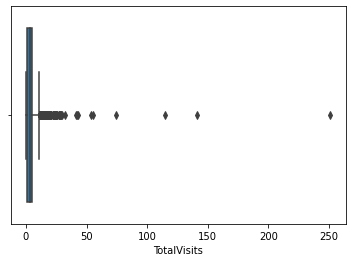

In [38]:
sns.boxplot(Lead_df['TotalVisits'])
plt.show()

Since 'TotalVisits' is a numerical column and has outliers since it contains few values which are very high as compared to the other values, it can be imputed with median.

In [39]:
#Imputing ['TotalVisits] with median:
Lead_df['TotalVisits'].fillna(Lead_df['TotalVisits'].median(),inplace =True)

In [40]:
#Inspecting the fields one by one ['Page Views Per Visit]:
Lead_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

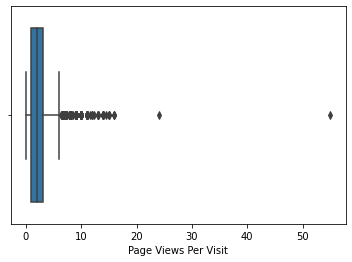

In [41]:
sns.boxplot(Lead_df['Page Views Per Visit'])
plt.show()

Since 'Page Views Per Visit' is a numerical column and has outliers since it contains few values which are very high as compared to the other values, it can be imputed with median.

In [42]:
#Imputing ['Page Views Per Visit] with median:
Lead_df['Page Views Per Visit'].fillna(Lead_df['Page Views Per Visit'].median(),inplace =True)

In [43]:
#Inspecting the fields one by one ['Last Activity]:
Lead_df['Last Activity'].value_counts(normalize=True, dropna=False)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [44]:
#Imputing the missing value 
Lead_df['Last Activity'].fillna("Not Specified", inplace=True)


In [45]:
#Merging the other insgnificant fields together
Lead_df = Lead_df.replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam', 'Resubscribed to emails', 'Visited Booth in Tradeshow'],'Others')

In [46]:
#Inspecting the fields one by one ['Tags']:
Lead_df['Lead Source'].value_counts(normalize=True, dropna=False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [47]:
#Imputing the NANs
Lead_df['Lead Source'].fillna("Google", inplace=True)

In [48]:
#Merging the other less significant values
Lead_df = Lead_df.replace(['Referral Sites', 'Facebook', 'bing', 'google', 'Click2call',
                                                     'Live Chat', 'Social Media', 'Press_Release', 'testone',
                                                     'Pay per Click Ads', 'WeLearn', 'blog', 'welearnblog_Home',
                                                     'NC_EDM', 'youtubechannel'], 'Other Sources')

In [49]:
#Inspecting the fields one by one ['Digital Advertisement']:
Lead_df['Digital Advertisement'].value_counts(normalize=True, dropna=False)*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

Insights:

1.   List item
2.   List item


1. This field can be dropped as it contains higher concentration of "No".

In [50]:
# Dropping Column  ['Digital Advertisement ']
Lead_df.drop('Digital Advertisement', axis = 1, inplace = True)

After carefully seeing the other columns, it can be inferred that they will not be adding any value to the models, hence they can be dropped.

In [51]:
#Dropping the redundant values:
Lead_df.drop(['Get updates on DM Content','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque','Through Recommendations','Search','Newspaper','X Education Forums','Newspaper Article','Magazine','Do Not Call'], axis = 1, inplace = True)

In [52]:
#Inspecting the present dataset
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [53]:
Lead_df.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation              0
Tags                                         0
Lead Profile                              6855
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [54]:
Lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,NaN,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Potential Lead,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,NaN,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,NaN,No,Modified


In [55]:
Lead_df['Tags'].value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Other                                  1265
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Still Thinking                            6
Interested in Next batch                  5
Name: Tags, dtype: int64

In [56]:
Lead_df['Lead Profile'].fillna('Not Specified', inplace = True)

In [57]:
#Inspecting the null values again
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

All the null values have now been taken care of

**Step 3 : Univariate Analysis**

**Let's see the influence of categorical variables first on the target variable**

In [58]:
# Lead number is a unique id for every lead but doesn't add any value to the analysis, so we will not be using it in the analysis

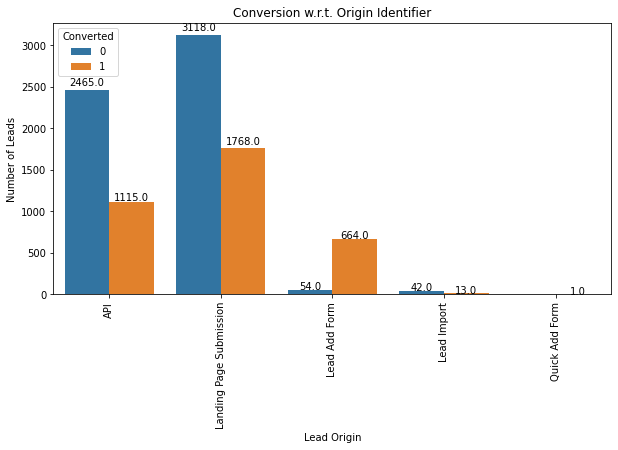

In [59]:
#Plotting Lead origin  vs target variable converted
plt.figure(figsize=(10, 5))
lead = sns.countplot(x = Lead_df['Lead Origin'], hue = Lead_df['Converted'], data= Lead_df)
plt.xticks(rotation = 90)
plt.title ('Conversion w.r.t. Origin Identifier')
plt.ylabel('Number of Leads')
for p in lead.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        lead.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show()

It can be clearly seen that customers identified through the 'Lead add form' have higher conversion rate than rest of the identifiers

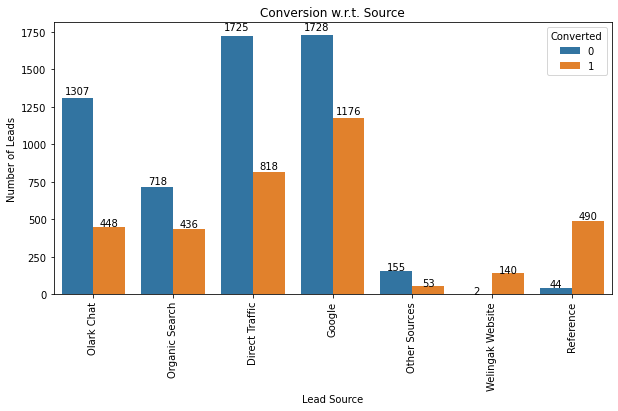

In [60]:
#Plotting Lead source vs target variable converted
plt.figure(figsize=(10, 5))
lead = sns.countplot(x = Lead_df['Lead Source'], hue = Lead_df['Converted'], data= Lead_df)
plt.xticks(rotation = 90)
plt.title ('Conversion w.r.t. Source')
plt.ylabel('Number of Leads')
for p in lead.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        lead.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show()

Leads received through **references** and **Wellingkak Website**  have a greater chance to get converted
Leads through all other sources saw more rejections than conversions

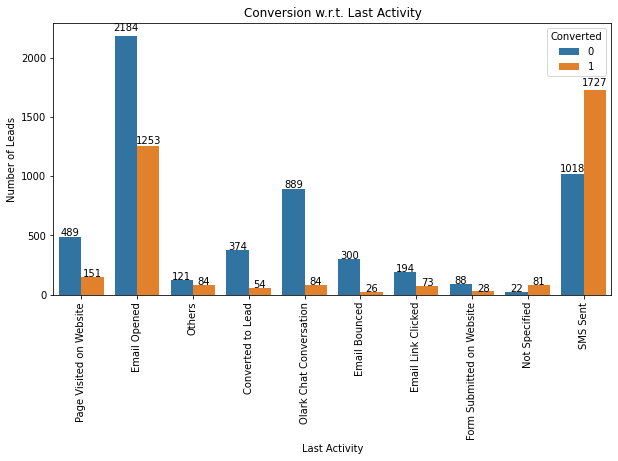

In [61]:
#Plotting Last Activity vs target variable converted
plt.figure(figsize=(10, 5))
lead = sns.countplot(x = Lead_df['Last Activity'], hue = Lead_df['Converted'], data= Lead_df)
plt.xticks(rotation = 90)
plt.title ('Conversion w.r.t. Last Activity')
plt.ylabel('Number of Leads')
for p in lead.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        lead.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show()

When the last activity performed by the customer is 'SMS Sent', then the chances of conversion are much higher (1727 converted out of 2745 which is more than 60% conversion)

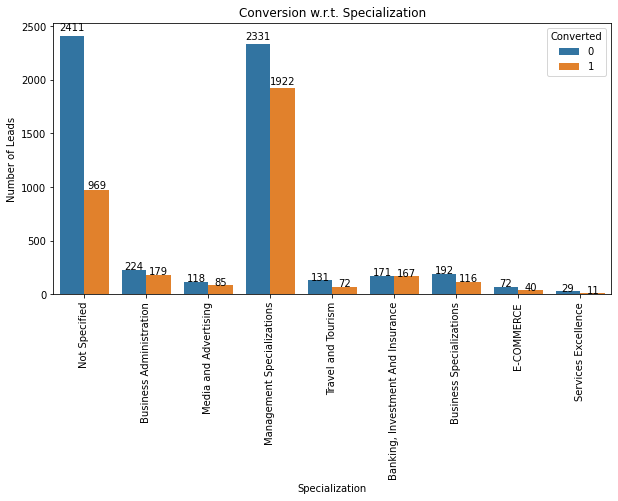

In [62]:
#Plotting Specialization vs target variable converted
plt.figure(figsize=(10, 5))
lead = sns.countplot(x = Lead_df['Specialization'], hue = Lead_df['Converted'], data= Lead_df)
plt.xticks(rotation = 90)
plt.title ('Conversion w.r.t. Specialization')
plt.ylabel('Number of Leads')
for p in lead.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        lead.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show()

1. In absolute terms, leads with management specialisation have the highest number of conversions while leads working in services have the lowest conversion in all specializations

2. All specializations have higher rejections than conversions with the exceptions of Banking, Investment and Insurance where the proportion is equal

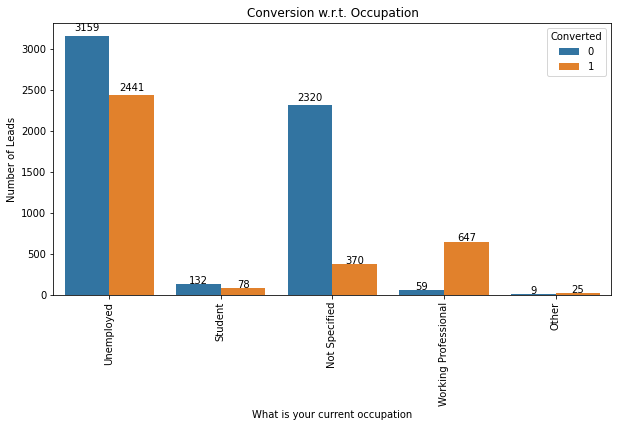

In [63]:
#Plotting Occupation vs target variable converted
plt.figure(figsize=(10, 5))
lead = sns.countplot(x = Lead_df['What is your current occupation'], hue = Lead_df['Converted'], data= Lead_df)
plt.xticks(rotation = 90)
plt.title ('Conversion w.r.t. Occupation')
plt.ylabel('Number of Leads')
for p in lead.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        lead.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show()

1. Working Professionals and 'others' have a very high chance of conversion with only small number of rejections

2. Freshers/Students also have less gap between rejections and conversions

3. Unemployed and Unspecified (only 370 converted out of 2690) occupation types are least likely to get converted with huge gap between conversions and rejections

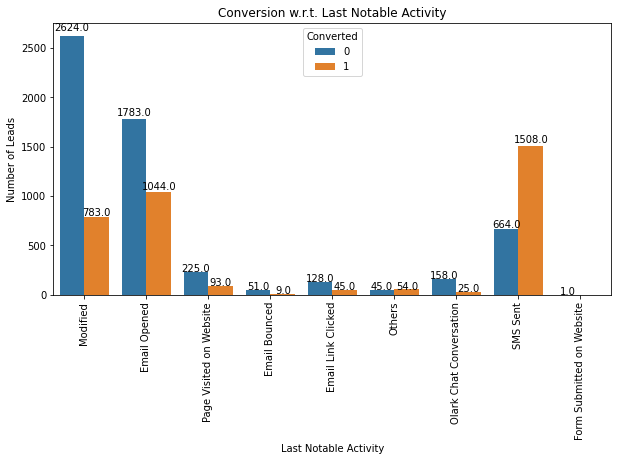

In [64]:
#Plotting Last Notable Activity vs target variable converted
plt.figure(figsize=(10, 5))
lead = sns.countplot(x = Lead_df['Last Notable Activity'], hue = Lead_df['Converted'], data= Lead_df)
plt.xticks(rotation = 90)
plt.title ('Conversion w.r.t. Last Notable Activity')
plt.ylabel('Number of Leads')
for p in lead.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        lead.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show()

When the Last Notable activity was 'SMS Sent', 1508 out of 2172 (close to 70%) of the leads were converted

In [65]:
# Lets us check for the percentage of coverted values
sum(Lead_df['Converted'])/len(Lead_df['Converted'])*100

38.53896103896104

So, almost 38.5% of the leads were converted

**Lets check the influence of Numerical variables on Target Variable**

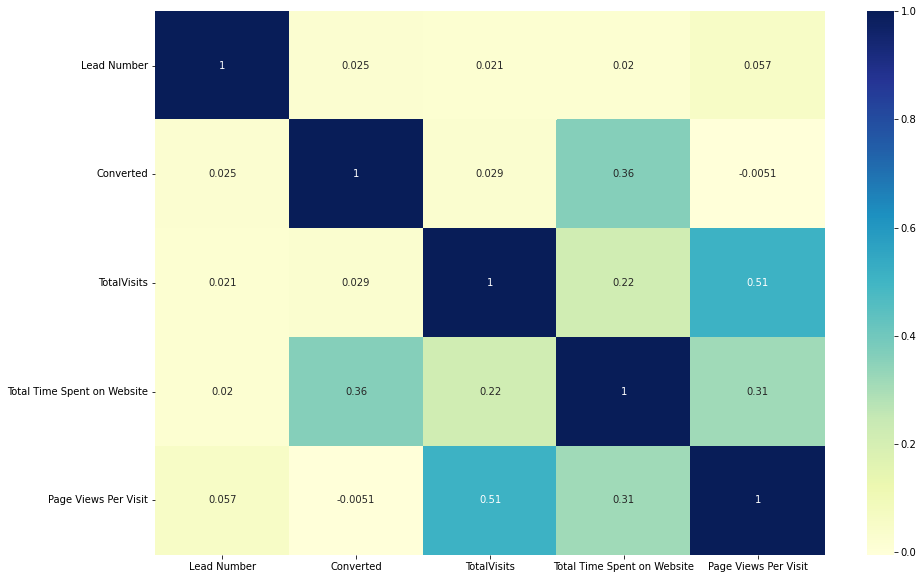

In [66]:
# Checking the Numberical columns for Corelation
plt.figure(figsize = (15,10))
sns.heatmap(Lead_df.corr(), annot = True, cmap= 'YlGnBu')
plt.show()

1. According to the heatmap, only 'Time spent on website' seems to have some bit of correleation with conversion but that is also low

2. 'Page views' increase proportionately with 'Total Visits' to the site.

# Step 4: Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [67]:
# Mapping the 'Do Not Email' and  'A free copy of Mastering The Interview' column

Lead_df['Do Not Email'] = Lead_df['Do Not Email'].map({'Yes':1,"No":0})
Lead_df['A free copy of Mastering The Interview'] = Lead_df['A free copy of Mastering The Interview'].map({'Yes':1,"No":0})

In [68]:
# Inspecting the dataset:
Lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Potential Lead,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Not Specified,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Not Specified,0,Modified


In [69]:
Lead_df.shape

(9240, 15)

## Dummy variable creation

In [70]:
#Getting the list of category columns:
cat_columns=Lead_df.select_dtypes(include=['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Profile', 'Last Notable Activity'], dtype='object')

In [71]:
#Creating the dummy variables for all the category columns and dropping the first one
Lead_df_new = pd.get_dummies(data=Lead_df,columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Profile', 'Last Notable Activity'],drop_first=True)

In [72]:
#inspecting the data post dummy variable creation:
Lead_df_new.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Not Specified,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Specified,Tags_Other,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Lead Profile_Lateral Student,Lead Profile_Not Specified,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [73]:
#checking the data post dummy variable creation:
Lead_df_new.shape

(9240, 59)

In [74]:
Lead_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Do Not Email                                          9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9240

## Checking for Outliers

In [75]:
  # Checking for outliers in the continuous variables
num_lead = Lead_df_new[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [76]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


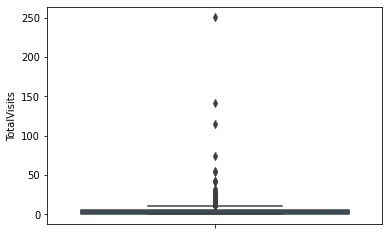

In [77]:
#Boxplot for visualy checking outliers:
plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_df_new['TotalVisits'])
plt.show()

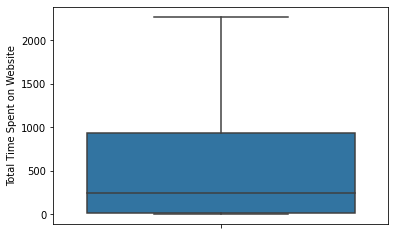

In [78]:
#Boxplot for visualy checking outliers:
plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_df_new['Total Time Spent on Website'])
plt.show()

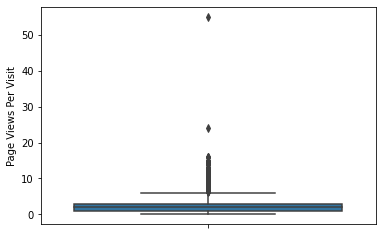

In [79]:
#Boxplot for visualy checking outliers:
plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_df_new['Page Views Per Visit'])
plt.show()

From the above it can be inferred that 'TotalVisits' and 'Page Views Per Visit' have outliers.Thus, they can be treated by capping at 99% of the value to handle outliers.

In [80]:
# capping by 99%
Lead_df_new['TotalVisits'].loc[Lead_df_new['TotalVisits'] >= Lead_df_new['TotalVisits'].quantile(0.99)] = Lead_df_new['TotalVisits'].quantile(0.99)
Lead_df_new['Page Views Per Visit'].loc[Lead_df_new['Page Views Per Visit'] >= Lead_df_new['Page Views Per Visit'].quantile(0.99)] = Lead_df_new['Page Views Per Visit'].quantile(0.99)

# Step 5 - Splitting data into training and test

In [81]:
# Putting feature variable to X
X = Lead_df_new.drop('Converted', axis=1)
X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Not Specified,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Specified,Tags_Other,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Lead Profile_Lateral Student,Lead Profile_Not Specified,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,660727,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,660681,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [82]:
# Putting response variable to y
y = Lead_df_new['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6: Feature Scaling

In [84]:
# Scaling the Numerical variables
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Not Specified,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Specified,Tags_Other,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Lead Profile_Lateral Student,Lead Profile_Not Specified,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,641410,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6795,597687,0,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3516,626825,0,0.512365,-0.691418,0.092260,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
8105,587928,0,0.512365,1.365219,1.364995,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3934,622366,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [85]:
### Checking the Conversion Rate
Converted = (sum(Lead_df_new['Converted'])/len(Lead_df_new['Converted'].index))*100
Converted

38.53896103896104

We have almost 38.5% conversion rate

## Step 7: Looking at Correlations

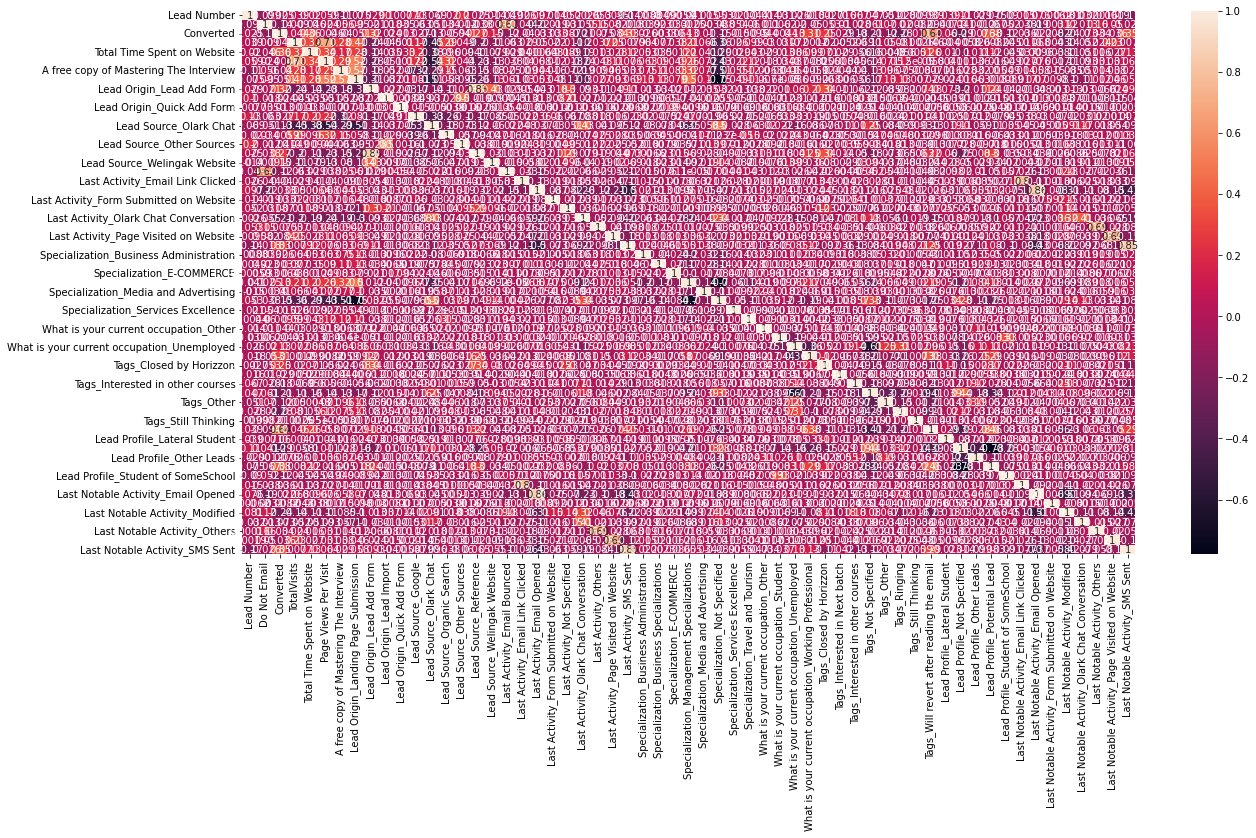

In [86]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_df_new.corr(),annot = True)
plt.show()

1. Since there are lot of variables, its difficult to identify the correlation pattersn from the above heatmap.

## Step 8: Model Building
Let's start by splitting our data into a training set and a test set.

### 1st Model

In [87]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6409
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1397.1
Date:                Tue, 24 Jan 2023   Deviance:                       2794.1
Time:                        10:54:15   Pearson chi2:                 7.96e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    9.8333   1.82e+04      0.001      1.000   -3.57e+04    3.57e+04
Lead Number                                           6.972e-06   2.34e-06      2.980      0.003    2.39e-06    1.16e-05
Do Not Email                                            -1.1633      0.284     -4.097      0.000      -1.720      -0.607
TotalVisits                                              0.2570      0.073      3.542      0.000       0.115       0.399
Total Time Spent on Website                              1.0685      0.057     18.634      0.000       0.956       1.181
Page Views Per Visit                                    -0.2304      0.084     -2.739      0.006      -0.395      -0.065
A free copy of Mastering The Interview                  -0.0026      0.159     -0.016      0.987      -0.314       0.309
Lead Origin_Landing Page Submission                     -0.3041      0.210     -1.448      0.148      -0.716       0.107
Lead Origin_Lead Add Form                                1.7224      0.743      2.318      0.020       0.266       3.179
Lead Origin_Lead Import                                 -0.3416      0.788     -0.433      0.665      -1.886       1.203
Lead Origin_Quick Add Form                              23.0793   7.94e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -0.0276      0.166     -0.166      0.868      -0.353       0.298
Lead Source_Olark Chat                                   0.8918      0.224      3.980      0.000       0.453       1.331
Lead Source_Organic Search                              -0.1715      0.194     -0.885      0.376      -0.551       0.208
Lead Source_Other Sources                               -0.3065      0.400     -0.766      0.444      -1.091       0.478
Lead Source_Reference                                   -0.3190      0.824     -0.387      0.699      -1.935       1.297
Lead Source_Welingak Website                             2.5401      1.048      2.425      0.015       0.487       4.594
Last Activity_Email Bounced                             -0.8409      0.699     -1.203      0.229      -2.211       0.529
Last Activity_Email Link Clicked                         0.4504      0.613      0.735      0.463      -0.751       1.652
Last Activity_Email Opened                               0.8713      0.350      2.491      0.013       0.186       1.557
Last Activity_Form Submitted on Website                  0.6147      0.527      1.167      0.243      -0.418       1.647
Last Activity_Not Specified                             -1.3919      0.783     -1.778      0.075      -2.926       0.142
Last Activity_Olark Chat Conversation                   -0

# Step 9: Feature Selection Using RFE

In [88]:
logreg = LogisticRegression()

In [89]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

In [90]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False,  True])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', False, 4),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 6),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 29),
 ('Lead Origin_Quick Add Form', False, 37),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Other Sources', False, 20),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', False, 12),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Not Specified', False, 15),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 32),
 ('Last Activity_Page Visite

In [92]:
col = X_train.columns[rfe.support_]

In [93]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Other Sources', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_Not Specified',
       'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Specialization_Business Administration', 'Specialization_Business Specializations', 'Specialization_E-COMMERCE', 'Specialization_Media and Advertising', 'Specialization_Services Excellence', 'Specialization_Travel and Tourism', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'Tags_Interested in Next batch', 'Tags_Still Thinking',
       'Lead Profile_Lateral 

## Second Model
##### Assessing the model with StatsModels Library

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1532.8
Date:                Tue, 24 Jan 2023   Deviance:                       3065.7
Time:                        10:54:16   Pearson chi2:                 8.49e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -10.1315      1.390     -7.290      0.000     -12.855      -7.407
Lead Number                                           9.107e-06   2.15e-06      4.242      0.000     4.9e-06    1.33e-05
Total Time Spent on Website                              1.0884      0.054     20.264      0.000       0.983       1.194
Lead Origin_Lead Add Form                                4.0097      0.401      9.992      0.000       3.223       4.796
Lead Source_Olark Chat                                   1.1526      0.146      7.882      0.000       0.866       1.439
Lead Source_Reference                                   -2.2984      0.534     -4.303      0.000      -3.345      -1.252
Last Activity_Olark Chat Conversation                   -0.8407      0.212     -3.969      0.000      -1.256      -0.426
Last Activity_SMS Sent                                   1.2270      0.194      6.318      0.000       0.846       1.608
Specialization_Management Specializations                0.1774      0.142      1.251      0.211      -0.101       0.455
Specialization_Not Specified                             0.5655      0.158      3.590      0.000       0.257       0.874
What is your current occupation_Working Professional     0.9363      0.320      2.929      0.003       0.310       1.563
Tags_Closed by Horizzon                                  9.1422      1.100      8.312      0.000       6.986      11.298
Tags_Interested in other courses                         0.5430      0.534      1.017      0.309      -0.503       1.589
Tags_Not Specified                                       2.5967      0.429      6.049      0.000       1.755       3.438
Tags_Other                                               2.4224      0.427      5.671      0.000       1.585       3.260
Tags_Ringing                                            -0.7019      0.474     -1.482      0.138      -1.630       0.226
Tags_Will revert after reading the email                 6.4702      0.449     14.418      0.000       5.591       7.350
Lead Profile_Not Specified                              -0.1819      0.228     -0.799      0.424      -0.628       0.264
Lead Profile_Potential Lead                              0.8083      0.261      3.102      0.002       0.298       1.319
Last Notable Activity_Modified                          -0.9170      0.132     -6.935      0.000      -1.176      -0.658
Last Notable Activity_SMS Sent                           0.7181      0.225      3.186      0.001       0.276       1.160
========================================================================================================================
"""

In [95]:
# Dropping the variables having p-values greater than 0.05
col = col.drop(['Specialization_Management Specializations','Tags_Interested in other courses','Tags_Ringing','Lead Profile_Not Specified'])

## Third Model

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1538.7
Date:                Tue, 24 Jan 2023   Deviance:                       3077.5
Time:                        10:54:16   Pearson chi2:                 7.96e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -10.6811      1.343     -7.950      0.000     -13.314      -8.048
Lead Number                                            9.38e-06   2.14e-06      4.388      0.000    5.19e-06    1.36e-05
Total Time Spent on Website                              1.0915      0.054     20.370      0.000       0.986       1.197
Lead Origin_Lead Add Form                                3.9916      0.398     10.033      0.000       3.212       4.771
Lead Source_Olark Chat                                   1.1599      0.146      7.949      0.000       0.874       1.446
Lead Source_Reference                                   -2.2834      0.527     -4.332      0.000      -3.317      -1.250
Last Activity_Olark Chat Conversation                   -0.8534      0.212     -4.018      0.000      -1.270      -0.437
Last Activity_SMS Sent                                   1.1974      0.194      6.173      0.000       0.817       1.578
Specialization_Not Specified                             0.4421      0.118      3.751      0.000       0.211       0.673
What is your current occupation_Working Professional     0.9697      0.323      3.001      0.003       0.336       1.603
Tags_Closed by Horizzon                                  9.4707      1.031      9.183      0.000       7.449      11.492
Tags_Not Specified                                       2.9295      0.189     15.524      0.000       2.560       3.299
Tags_Other                                               2.7896      0.197     14.132      0.000       2.403       3.176
Tags_Will revert after reading the email                 6.8251      0.248     27.558      0.000       6.340       7.310
Lead Profile_Potential Lead                              0.9690      0.185      5.250      0.000       0.607       1.331
Last Notable Activity_Modified                          -0.8963      0.132     -6.776      0.000      -1.155      -0.637
Last Notable Activity_SMS Sent                           0.6969      0.225      3.102      0.002       0.257       1.137
========================================================================================================================
"""

p-value of all the variables is now less than 0.05

In [97]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.011304
6795    0.154859
3516    0.018812
8105    0.144058
3934    0.102062
4844    0.999576
3297    0.003748
8071    0.998854
987     0.189791
7423    0.999226
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01130358, 0.1548585 , 0.01881151, 0.14405797, 0.10206158,
       0.99957609, 0.00374766, 0.99885442, 0.18979144, 0.99922591])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.011304,1871
1,0,0.154859,6795
2,0,0.018812,3516
3,0,0.144058,8105
4,0,0.102062,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.011304,1871,0
1,0,0.154859,6795,0
2,0,0.018812,3516,0
3,0,0.144058,8105,0
4,0,0.102062,3934,0


In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3790  212]
 [ 414 2052]]


In [102]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted    3778          224
# Converted        522           1944  

In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9032158317872604


#### Checking VIFs

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_SMS Sent,6.40
0,Lead Number,6.21
6,Last Activity_SMS Sent,6.12
2,Lead Origin_Lead Add Form,4.65
4,Lead Source_Reference,4.47
12,Tags_Will revert after reading the email,2.86
10,Tags_Not Specified,2.73
7,Specialization_Not Specified,2.55
14,Last Notable Activity_Modified,2.45
3,Lead Source_Olark Chat,2.13


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Last Notable Activity_SMS Sent' has the highest VIF. So let's start by dropping that.

In [105]:
col = col.drop('Last Notable Activity_SMS Sent', 1)
col

Index(['Lead Number', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Not Specified', 'What is your current occupation_Working Professional', 'Tags_Closed by Horizzon', 'Tags_Not Specified', 'Tags_Other', 'Tags_Will revert after reading the email', 'Lead Profile_Potential Lead', 'Last Notable Activity_Modified'], dtype='object')

# Fourth Model

In [106]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1543.6
Date:                Tue, 24 Jan 2023   Deviance:                       3087.2
Time:                        10:54:17   Pearson chi2:                 7.90e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -10.1535      1.327     -7.652      0.000     -12.754      -7.553
Lead Number                                           8.704e-06   2.12e-06      4.110      0.000    4.55e-06    1.29e-05
Total Time Spent on Website                              1.0918      0.054     20.397      0.000       0.987       1.197
Lead Origin_Lead Add Form                                3.9988      0.399     10.028      0.000       3.217       4.780
Lead Source_Olark Chat                                   1.1550      0.146      7.936      0.000       0.870       1.440
Lead Source_Reference                                   -2.3321      0.529     -4.411      0.000      -3.368      -1.296
Last Activity_Olark Chat Conversation                   -0.7498      0.210     -3.565      0.000      -1.162      -0.338
Last Activity_SMS Sent                                   1.7051      0.104     16.420      0.000       1.502       1.909
Specialization_Not Specified                             0.4484      0.117      3.821      0.000       0.218       0.678
What is your current occupation_Working Professional     0.9568      0.324      2.949      0.003       0.321       1.593
Tags_Closed by Horizzon                                  9.5349      1.033      9.235      0.000       7.511      11.559
Tags_Not Specified                                       2.8754      0.187     15.410      0.000       2.510       3.241
Tags_Other                                               2.7599      0.196     14.057      0.000       2.375       3.145
Tags_Will revert after reading the email                 6.8132      0.248     27.503      0.000       6.328       7.299
Lead Profile_Potential Lead                              0.9702      0.185      5.246      0.000       0.608       1.333
Last Notable Activity_Modified                          -1.1464      0.108    -10.641      0.000      -1.358      -0.935
========================================================================================================================
"""

In [107]:
res.params

const                                                  -10.153529
Lead Number                                              0.000009
Total Time Spent on Website                              1.091771
Lead Origin_Lead Add Form                                3.998760
Lead Source_Olark Chat                                   1.155039
Lead Source_Reference                                   -2.332098
Last Activity_Olark Chat Conversation                   -0.749769
Last Activity_SMS Sent                                   1.705052
Specialization_Not Specified                             0.448399
What is your current occupation_Working Professional     0.956823
Tags_Closed by Horizzon                                  9.534920
Tags_Not Specified                                       2.875372
Tags_Other                                               2.759852
Tags_Will revert after reading the email                 6.813244
Lead Profile_Potential Lead                              0.970168
Last Notab

In [108]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [109]:
y_train_pred[:10]

array([0.01234026, 0.16500787, 0.02085137, 0.13695418, 0.08542174,
       0.99953173, 0.00415013, 0.99872233, 0.15964266, 0.99917298])

In [110]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [111]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.012340,1871,0
1,0,0.165008,6795,0
2,0,0.020851,3516,0
3,0,0.136954,8105,0
4,0,0.085422,3934,0


In [112]:
#Again running the Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3780  222]
 [ 414 2052]]


In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9016697588126159


So overall the accuracy hasn't dropped much.

#### Checking the VIF again

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,5.98
2,Lead Origin_Lead Add Form,4.65
4,Lead Source_Reference,4.47
12,Tags_Will revert after reading the email,2.85
10,Tags_Not Specified,2.71
7,Specialization_Not Specified,2.54
3,Lead Source_Olark Chat,2.13
14,Last Notable Activity_Modified,1.89
13,Lead Profile_Potential Lead,1.75
6,Last Activity_SMS Sent,1.63


It can be seen from above that all the remaining variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model.

## Metrics beyond simply accuracy

In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Calculating sensitivity
TP / float(TP+FN)

0.8321167883211679

In [117]:
# Calculating specificity
TN / float(TN+FP)

0.9445277361319341

In [118]:
# Calculating false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05547226386806597


In [119]:
# Calculating positive predictive value 
print (TP / float(TP+FP))

0.9023746701846965


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9012875536480687


### Step 10: Plotting the ROC Curve

In [121]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

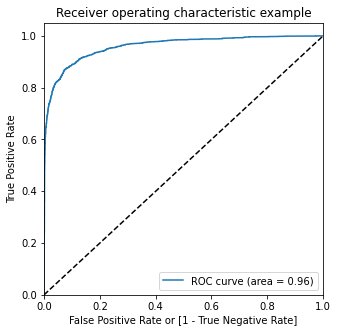

In [123]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 11: Finding Optimal Cutoff Point

In [124]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.012340,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.165008,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.020851,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.136954,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.085422,3934,0,1,0,0,0,0,0,0,0,0,0


In [125]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.789734     0.970397     0.678411
0.2   0.2  0.865955     0.929440     0.826837
0.3   0.3  0.896413     0.884834     0.903548
0.4   0.4  0.903216     0.858881     0.930535
0.5   0.5  0.901670     0.832117     0.944528
0.6   0.6  0.902752     0.800487     0.965767
0.7   0.7  0.893630     0.759124     0.976512
0.8   0.8  0.882189     0.713706     0.986007
0.9   0.9  0.865337     0.659773     0.992004


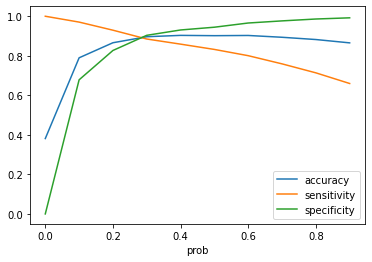

In [126]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [127]:
print(confusion)

[[3780  222]
 [ 414 2052]]


#### From the curve above,it can be seen that 0.3 is the optimum point to take it as a cutoff probability.

In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.012340,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.165008,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.020851,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.136954,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.085422,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [129]:
# Calculating the overall accuracy again.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.896413110698825


In [130]:
#Again running the Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3616,  386],
       [ 284, 2182]])

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
# Calculating sensitivity
TP / float(TP+FN)

0.8848337388483374

In [133]:
# Calculating specificity
TN / float(TN+FP)

0.9035482258870565

In [134]:
# Calculating false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09645177411294353


In [135]:
# Calculating positive predictive value 
print (TP / float(TP+FP))

0.8496884735202492


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9271794871794872


## Step12 Precision and Recall

In [137]:
##### Precision
# TP / TP + FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8496884735202492

In [138]:
##### Recall
#TP / TP + FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8848337388483374

### Precision and recall tradeoff

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

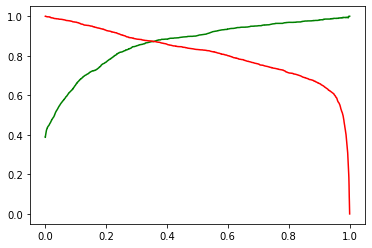

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Thus as per above, the cutoff can be considered as 0.38

### Step 13: Making predictions on the test set

In [141]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [142]:
X_test = X_test[col]
X_test.head()

,Lead Number,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Not Specified,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Not Specified,Tags_Other,Tags_Will revert after reading the email,Lead Profile_Potential Lead,Last Notable Activity_Modified
4269,619003,0.964504,0,0,0,0,1,1,0,0,1,0,0,0,0
2376,636884,-0.885371,1,0,1,0,1,1,0,0,0,0,1,0,0
7766,590281,-0.777416,0,0,0,0,0,0,1,0,0,0,1,0,0
9199,579892,-0.885371,0,1,0,1,0,1,0,0,0,0,0,1,1
4359,617929,-0.885371,1,0,1,0,0,0,0,0,0,0,1,1,0


In [143]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [144]:
y_test_pred = res.predict(X_test_sm)

In [145]:
y_test_pred[:10]

4269    0.788503
2376    0.993672
7766    0.870502
9199    0.004516
4359    0.976065
9186    0.990425
1631    0.986425
8963    0.937581
8007    0.027065
5324    0.953396
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.788503
1,1,2376,0.993672
2,1,7766,0.870502
3,0,9199,0.004516
4,1,4359,0.976065


In [152]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [153]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [154]:
# Inspecting y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.788503
1,2376,1,0.993672
2,7766,1,0.870502
3,9199,0,0.004516
4,4359,1,0.976065


In [155]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [156]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.788503,1
1,2376,1,0.993672,1
2,7766,1,0.870502,1
3,9199,0,0.004516,0
4,4359,1,0.976065,1


In [157]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9044011544011544

In [158]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1556,  121],
       [ 144,  951]])

In [159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
# Calculating sensitivity of the model
TP / float(TP+FN)

0.8684931506849315

In [161]:
# Calculating specificity of the model
TN / float(TN+FP)

0.9278473464519976

In [165]:
print(confusion2)

[[1556  121]
 [ 144  951]]


### Assigning Lead Score

In [162]:
y_pred_final['Lead Score'] = y_pred_final['Converted_Prob'].map(lambda x: round(x*100))

In [163]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
0,4269,1,0.788503,1,79
1,2376,1,0.993672,1,99
2,7766,1,0.870502,1,87
3,9199,0,0.004516,0,0
4,4359,1,0.976065,1,98


In [164]:
#Checking the coefficient of all parametres as per model 4(the final model)
res.params

const                                                  -10.153529
Lead Number                                              0.000009
Total Time Spent on Website                              1.091771
Lead Origin_Lead Add Form                                3.998760
Lead Source_Olark Chat                                   1.155039
Lead Source_Reference                                   -2.332098
Last Activity_Olark Chat Conversation                   -0.749769
Last Activity_SMS Sent                                   1.705052
Specialization_Not Specified                             0.448399
What is your current occupation_Working Professional     0.956823
Tags_Closed by Horizzon                                  9.534920
Tags_Not Specified                                       2.875372
Tags_Other                                               2.759852
Tags_Will revert after reading the email                 6.813244
Lead Profile_Potential Lead                              0.970168
Last Notab

Final Observation:

1) Let us compare the values obtained for Train & Test:

A) Train Data:
*   Accuracy:89.6%
*   sensitivity:87.5%
*   specificity: 90.3%

B) Test Data:
*   Accuracy: 90.4%
*   Sensitivity: 88.5%
*   Specificity: 92.7%

2) The model seems to predict the conversion rate quite well.

3) As per coefficients and the heatmap, the top 3 variables are:
*   Lead Origin_Lead Add Form
*   Total Time spent on the website
*   Last Activity_SMS sent
